In [1]:
import PyPlot

In [29]:
function chemical_avalanche(Nx, Ny, ΔE, T)
    k = 1  # Setting k_B = 1 (natural units) for simplicity.
    E₀ = 1
    
    τ₀ = exp(-E₀ / (k*T))
    N = Nx*Ny;

    dissolved = BitArray{2}(undef, Nx, Ny)
    dissolved_times = Array{Float64,2}(undef, Nx, Ny)
    pᵢ = Array{Float64,2}(undef, Nx, Ny)
    Rᵢ = Array{Float64,2}(undef, Nx, Ny)
    Pᵢ = Array{Float64,2}(undef, Nx, Ny)

    dissolved .= false;
    dissolved_times .= Inf;

    pᵢ .= rand(Nx, Ny)

    times = Float64[0]
    dissolved_sum = Int64[0]

    t = 0
    while sum(dissolved) < N/2
        @. Rᵢ = exp(-pᵢ*ΔE / (k*T)) / τ₀
        Δt = 1 / sum(Rᵢ)
        Pᵢ .= Rᵢ ./ sum(Rᵢ)

        for j in 1:Ny, i in 1:Nx
            if !dissolved[i, j] && rand() < Pᵢ[i, j]
                dissolved[i, j] = true
                dissolved_times[i, j] = t
                pᵢ[i, j] = 1
                t = t + Δt
            end
        end

        push!(times, t)
        push!(dissolved_sum, sum(dissolved))
    end
    
    return times, dissolved_sum, dissolved_times
end

chemical_avalanche (generic function with 2 methods)

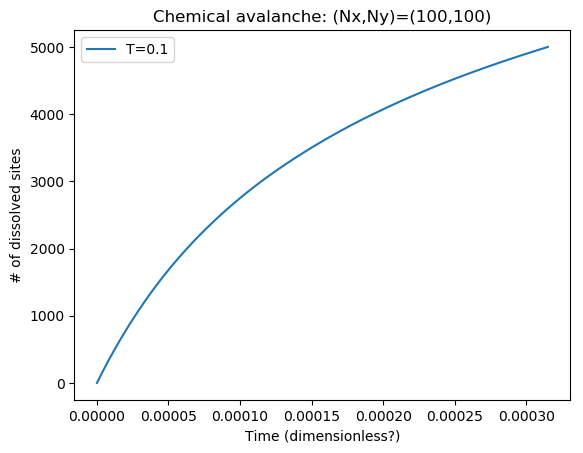

In [35]:
Nx, Ny, ΔE, T = 100, 100, 0.5, 0.1; PyPlot.plot(chemical_avalanche(Nx, Ny, ΔE, T)[1:2]..., label="T=$T");
PyPlot.title("Chemical avalanche: (Nx,Ny)=($Nx,$Ny)")
PyPlot.xlabel("Time (dimensionless?)")
PyPlot.ylabel("# of dissolved sites")
PyPlot.legend();

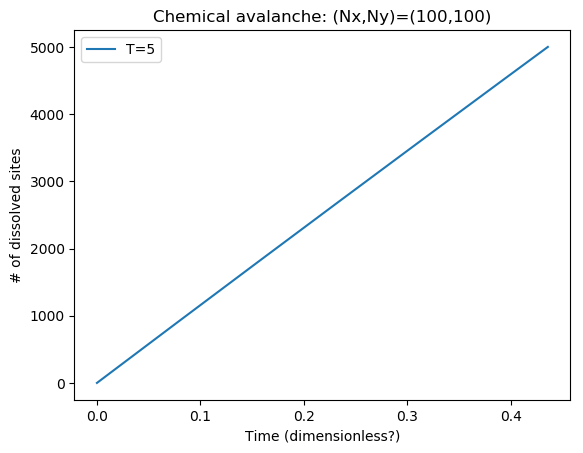

In [36]:
Nx, Ny, ΔE, T = 100, 100, 0.5, 5; PyPlot.plot(chemical_avalanche(Nx, Ny, ΔE, T)[1:2]..., label="T=$T");
PyPlot.title("Chemical avalanche: (Nx,Ny)=($Nx,$Ny)")
PyPlot.xlabel("Time (dimensionless?)")
PyPlot.ylabel("# of dissolved sites")
PyPlot.legend();

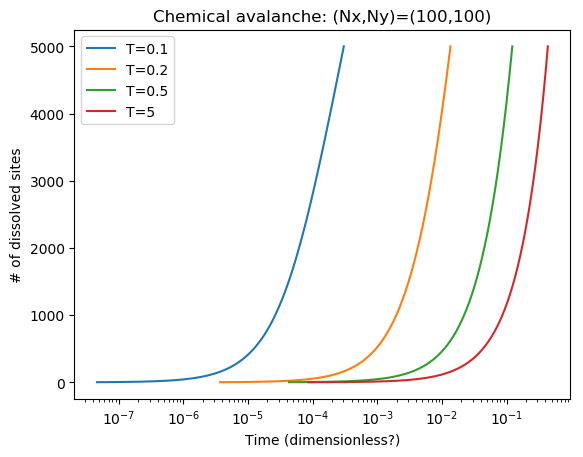

In [37]:
Nx, Ny, ΔE, T = 100, 100, 0.5, 0.1; PyPlot.semilogx(chemical_avalanche(Nx, Ny, ΔE, T)[1:2]..., label="T=$T");
Nx, Ny, ΔE, T = 100, 100, 0.5, 0.2; PyPlot.semilogx(chemical_avalanche(Nx, Ny, ΔE, T)[1:2]..., label="T=$T");
Nx, Ny, ΔE, T = 100, 100, 0.5, 0.5; PyPlot.semilogx(chemical_avalanche(Nx, Ny, ΔE, T)[1:2]..., label="T=$T");
Nx, Ny, ΔE, T = 100, 100, 0.5, 5; PyPlot.semilogx(chemical_avalanche(Nx, Ny, ΔE, T)[1:2]..., label="T=$T");
PyPlot.title("Chemical avalanche: (Nx,Ny)=($Nx,$Ny)")
PyPlot.xlabel("Time (dimensionless?)")
PyPlot.ylabel("# of dissolved sites")
PyPlot.legend();

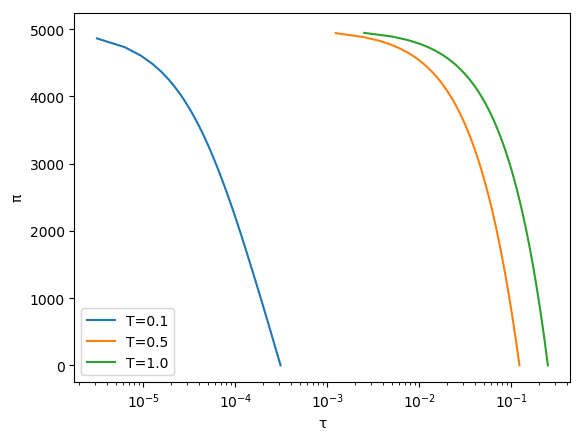

In [63]:
for T in [0.1, 0.5, 1]
    Nx, Ny, ΔE, T = 100, 100, 0.5, T;
    times, dissolved_sum, dissolved_times = chemical_avalanche(Nx, Ny, ΔE, T);

    τs = range(0; length=100, stop=maximum(times))
    ϖ = Array{Float64,1}(undef, 100)

    for (i, τ) in enumerate(τs)
        ϖ[i] = sum(dissolved_times[dissolved_times .!= Inf] .> τ)
    end

    PyPlot.semilogx(τs, ϖ, label="T=$T")
end
PyPlot.xlabel("τ")
PyPlot.ylabel("π")
PyPlot.legend();